# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Loading Dataset

In [2]:
import pandas as pd
data= pd.read_csv('URL_data.csv')

# Exploratory Data Analysis

In [3]:
data.head(10)

domain_name    asn               ip  \
0                netflix.com  16509      52.49.120.6   
1      push.prod.netflix.com  16509    35.167.71.134   
2     api-global.netflix.com  16509    52.42.194.172   
3                 google.com  15169    74.125.68.138   
4            ftl.netflix.com  40027       45.57.40.1   
5  nrdp.prod.ftl.netflix.com  40027       45.57.41.1   
6        ichnaea.netflix.com  16509     34.209.74.57   
7             www.google.com  15169  172.217.194.104   
8              microsoft.com   8075   40.113.200.201   
9         secure.netflix.com   4651   122.155.245.44   

                                               owner country_code  label  \
0                       AMAZON-02 - Amazon.com, Inc.           US      0   
1                       AMAZON-02 - Amazon.com, Inc.           US      0   
2                       AMAZON-02 - Amazon.com, Inc.           US      0   
3                                GOOGLE - Google LLC           US      0   
4      NETFLIX-ASN - Netflix Streaming Services Inc.           US      0   
5      NETFLIX-ASN - Netflix Streaming Services Inc.           US      0   
6                       AMAZON-02 - Amazon.com, Inc.           US      0   
7                                GOOGLE - Google LLC           US      0   
8  MICROSOFT-CORP-MSN-AS-BLOCK - Microsoft Corpor...           US      0   
9  THAI-GATEWAY The Communications Authority of T...           TH      0   

   domain _length  n_letters  n_number  n_hypans  n_dots   entropy  
0              11         10         0         0       1  3.459432  
1              21         18         0         0       3  3.975418  
2              22         19         0         1       2  3.879664  
3              10          9         0         0       1  2.646439  
4              15         13         0         0       2  3.373557  
5              25         21         0         0       4  3.683856  
6              19         17         0         0       2  3.616349  
7              14         12         0         0       2  2.842371  
8              13         12         0         0       1  3.026987  
9              18         16         0         0       2  3.683542

In [4]:
data.sample(10)

domain_name     asn              ip  \
1462                 adswizz.com   29169   217.70.184.38   
1761           radar.cedexis.com   63911      45.54.49.5   
9470           axisfinancial.org   15169   23.236.62.147   
8945           alishantea-tw.com   18779  172.252.56.168   
101              googlevideo.com   15169   74.125.68.105   
5533                dierendal.nl  198012   178.255.24.71   
8624  a55barin.000webhostapp.com  204915  145.14.145.219   
2562           widget.criteo.com   55569  182.161.72.147   
5689       etc.ashcarsales.co.za   37153  156.38.138.186   
6220                kitesgcc.com   14361     74.84.128.9   

                                                  owner country_code  label  \
1462  GANDI-AS Domain name registrar - http://www.ga...           FR      0   
1761                   NETACTUATE-AS-AP NetActuate, Inc           US      0   
9470                                GOOGLE - Google LLC           US      1   
8945                            EGIHOSTING - EGIHosting           US      1   
101                                 GOOGLE - Google LLC           US      0   
5533                                         INTERFORCE           NL      1   
8624                                               AWEX           US      1   
2562                           CRITEO-AS-AP Criteo APAC           JP      0   
5689                                            HETZNER           ZA      1   
6220        HOPONE-GLOBAL - HopOne Internet Corporation           US      1   

      domain _length  n_letters  n_number  n_hypans  n_dots   entropy  
1462              11         10         0         0       1  3.277613  
1761              17         15         0         0       2  3.381580  
9470              17         16         0         0       1  3.410417  
8945              17         15         0         1       1  3.690117  
101               15         14         0         0       1  3.106891  
5533              12         11         0         0       1  2.918296  
8624              26         19         5         0       2  3.950064  
2562              17         15         0         0       2  3.381580  
5689              21         18         0         0       3  3.236857  
6220              12         11         0         0       1  3.188722

In [5]:
data.columns

Index(['domain_name', 'asn', 'ip', 'owner', 'country_code', 'label',
       'domain _length', 'n_letters', 'n_number', 'n_hypans', 'n_dots',
       'entropy'],
      dtype='object')

In [6]:
data.shape

(10000, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domain_name     10000 non-null  object 
 1   asn             10000 non-null  int64  
 2   ip              10000 non-null  object 
 3   owner           10000 non-null  object 
 4   country_code    10000 non-null  object 
 5   label           10000 non-null  int64  
 6   domain _length  10000 non-null  int64  
 7   n_letters       10000 non-null  int64  
 8   n_number        10000 non-null  int64  
 9   n_hypans        10000 non-null  int64  
 10  n_dots          10000 non-null  int64  
 11  entropy         10000 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 937.6+ KB


In [8]:
data.ndim

2

In [9]:
data.nunique()

domain_name       9990
asn               1115
ip                7002
owner             1102
country_code        87
label                2
domain _length      68
n_letters           58
n_number            20
n_hypans            10
n_dots               9
entropy           1420
dtype: int64

In [10]:
data.describe().T

count          mean           std       min           25%  \
asn             10000.0  41165.383800  59746.806254  2.000000  14618.000000   
label           10000.0      0.500000      0.500025  0.000000      0.000000   
domain _length  10000.0     18.702300      7.985653  4.000000     13.000000   
n_letters       10000.0     15.927100      6.557750  2.000000     11.000000   
n_number        10000.0      0.673400      1.871706  0.000000      0.000000   
n_hypans        10000.0      0.245400      0.671136  0.000000      0.000000   
n_dots          10000.0      1.856300      0.882229  1.000000      1.000000   
entropy         10000.0      3.430663      0.367327  1.664498      3.189898   

                         50%          75%            max  
asn             20473.000000  40034.00000  396190.000000  
label               0.500000      1.00000       1.000000  
domain _length     17.000000     22.00000     126.000000  
n_letters          15.000000     19.00000      94.000000  
n_number            0.000000      0.00000      66.000000  
n_hypans            0.000000      0.00000       9.000000  
n_dots              2.000000      2.00000      15.000000  
entropy             3.447402      3.66935       4.821105

# Preprocessing & Analysis

Adding new feature

In [11]:
#top level domain
data['tld'] = data['domain_name'].str.extract('(?:\.)([a-zA-Z]{2,}$)', expand=False)

In [12]:
#URL Depth
data['url_depth'] = data['domain_name'].apply(lambda x: urlparse(x).path.count('.'))

In [13]:
import tldextract
# Extract subdomain count
data['subdomain_count'] = data['domain_name'].str.count('\.')

In [14]:
#company name
data['company'] = data['owner'].astype(str).str.extract('([A-Za-z]+(?:\.[A-Za-z]+)?)', expand=False)

In [15]:
#octet
data['ip_first_octet'] = data['ip'].str.split('.').str[0].astype(int)
data['ip_second_octet'] = data['ip'].str.split('.').str[1].astype(int)
data['ip_third_octet'] = data['ip'].str.split('.').str[2].astype(int)
data['ip_fourth_octet'] = data['ip'].str.split('.').str[3].astype(int)


In [16]:
data.head(3)

domain_name    asn             ip                         owner  \
0             netflix.com  16509    52.49.120.6  AMAZON-02 - Amazon.com, Inc.   
1   push.prod.netflix.com  16509  35.167.71.134  AMAZON-02 - Amazon.com, Inc.   
2  api-global.netflix.com  16509  52.42.194.172  AMAZON-02 - Amazon.com, Inc.   

  country_code  label  domain _length  n_letters  n_number  n_hypans  n_dots  \
0           US      0              11         10         0         0       1   
1           US      0              21         18         0         0       3   
2           US      0              22         19         0         1       2   

    entropy  tld  url_depth  subdomain_count company  ip_first_octet  \
0  3.459432  com          1                1  AMAZON              52   
1  3.975418  com          3                3  AMAZON              35   
2  3.879664  com          2                2  AMAZON              52   

   ip_second_octet  ip_third_octet  ip_fourth_octet  
0               49             120                6  
1              167              71              134  
2               42             194              172

Dataset analysis

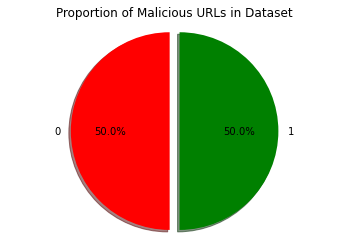

In [17]:
# Count the number of malicious and benign URLs in the dataset
malicious_count = data['label'].sum()
benign_count = len(data) - malicious_count
# Create a pie chart to show the proportion of malicious and benign URLs
labels = [0,1]
sizes = [malicious_count, benign_count]
colors = ['red', 'green']
explode = (0.1, 0)  # explode the malicious slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Malicious URLs in Dataset')
plt.show()

Correlation, Histogram

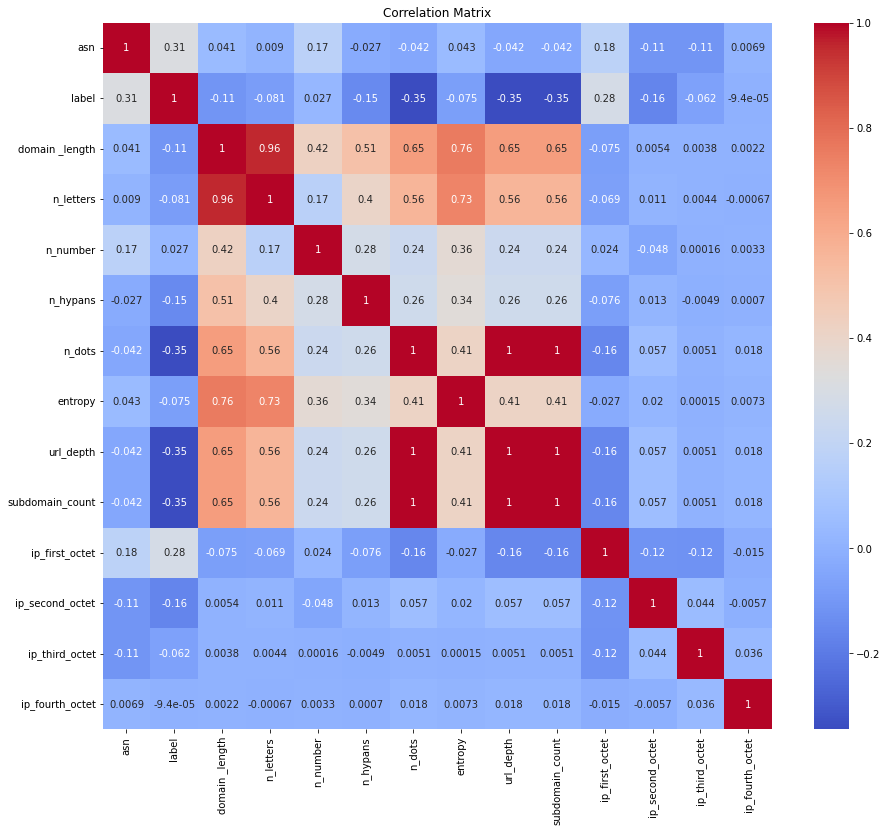

In [18]:
# Compute the correlation matrix
corr_matrix = data.corr()
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
data.head()

domain_name    asn             ip  \
0             netflix.com  16509    52.49.120.6   
1   push.prod.netflix.com  16509  35.167.71.134   
2  api-global.netflix.com  16509  52.42.194.172   
3              google.com  15169  74.125.68.138   
4         ftl.netflix.com  40027     45.57.40.1   

                                           owner country_code  label  \
0                   AMAZON-02 - Amazon.com, Inc.           US      0   
1                   AMAZON-02 - Amazon.com, Inc.           US      0   
2                   AMAZON-02 - Amazon.com, Inc.           US      0   
3                            GOOGLE - Google LLC           US      0   
4  NETFLIX-ASN - Netflix Streaming Services Inc.           US      0   

   domain _length  n_letters  n_number  n_hypans  n_dots   entropy  tld  \
0              11         10         0         0       1  3.459432  com   
1              21         18         0         0       3  3.975418  com   
2              22         19         0         1       2  3.879664  com   
3              10          9         0         0       1  2.646439  com   
4              15         13         0         0       2  3.373557  com   

   url_depth  subdomain_count  company  ip_first_octet  ip_second_octet  \
0          1                1   AMAZON              52               49   
1          3                3   AMAZON              35              167   
2          2                2   AMAZON              52               42   
3          1                1   GOOGLE              74              125   
4          2                2  NETFLIX              45               57   

   ip_third_octet  ip_fourth_octet  
0             120                6  
1              71              134  
2             194              172  
3              68              138  
4              40                1

In [20]:
data['country_code'].unique()

array(['US', 'TH', 'FR', 'CA', 'ID', 'SG', 'GB', 'IE', 'HK', 'DK', 'JP',
       'VG', 'KR', 'DE', 'CN', 'CZ', 'RU', 'MM', 'NL', 'SK', 'MY', 'SE',
       'PL', 'BM', 'VN', 'NZ', 'TW', 'BG', 'CY', 'ZZ', 'IL', 'AU', 'AT',
       'LU', 'TR', 'CH', 'BR', 'UA', 'GR', 'LT', 'HU', 'FI', 'CO', 'ZA',
       'BY', 'IT', 'ES', 'IN', 'CL', 'HR', 'RO', 'PA', 'PT', 'PH', 'MD',
       'SC', 'IR', 'BA', 'NG', 'BD', 'EE', 'BE', 'AR', 'AZ', 'SI', 'RS',
       'DZ', 'EU', 'GE', 'LK', 'KE', 'AE', 'NP', 'AI', 'PS', 'SA', 'CI',
       'MN', 'PK', 'PE', 'BT', 'EG', 'VE', 'GT', 'IS', 'KZ', 'TZ'],
      dtype=object)

In [21]:
CountryCode=data['country_code'].value_counts().sort_index(ascending=True)
CountryCode

AE      1
AI      1
AR      8
AT      6
AU     97
     ... 
VE      4
VG    246
VN     42
ZA     25
ZZ      1
Name: country_code, Length: 87, dtype: int64

Barplot

<AxesSubplot:>

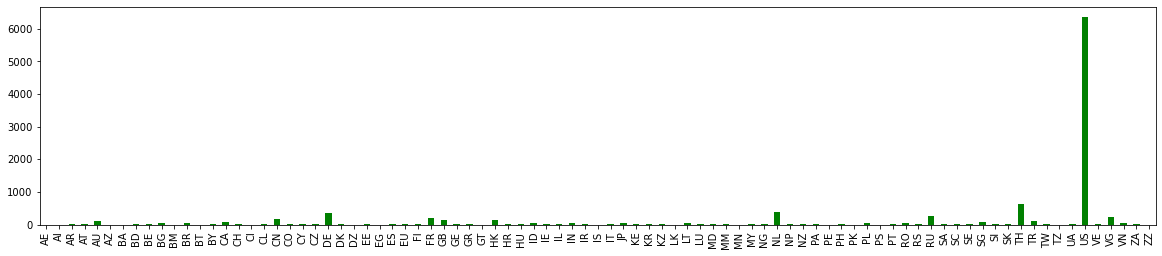

In [22]:
CountryCode.plot(kind='bar',figsize=(20,4),color='green')

Checking for null values

In [23]:
data.isnull().sum()

domain_name        0
asn                0
ip                 0
owner              0
country_code       0
label              0
domain _length     0
n_letters          0
n_number           0
n_hypans           0
n_dots             0
entropy            0
tld                2
url_depth          0
subdomain_count    0
company            0
ip_first_octet     0
ip_second_octet    0
ip_third_octet     0
ip_fourth_octet    0
dtype: int64

In [24]:
data.dropna(inplace=True)
data.isnull().sum()

domain_name        0
asn                0
ip                 0
owner              0
country_code       0
label              0
domain _length     0
n_letters          0
n_number           0
n_hypans           0
n_dots             0
entropy            0
tld                0
url_depth          0
subdomain_count    0
company            0
ip_first_octet     0
ip_second_octet    0
ip_third_octet     0
ip_fourth_octet    0
dtype: int64

One Hot Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['country_code_encoded'] = le.fit_transform(data[['country_code']])
data['company_encoded'] = le.fit_transform(data[['company']])
data['tld_encoded'] = le.fit_transform(data[['tld']])
data.sample(3)
# Fitting and transforming the columns using label encoding

F:\F PYTHON\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


domain_name    asn              ip  \
4080  scribe.logs.roku.com  14618    52.70.29.128   
9027   ambasadarozrywki.pl  39566   91.211.221.41   
3788     ssl.sc.omtrdc.net  15224  172.82.241.227   

                              owner country_code  label  domain _length  \
4080  AMAZON-AES - Amazon.com, Inc.           US      0              20   
9027                 TRUSTNET-PL-AS           PL      1              19   
3788  OMNITURE - Adobe Systems Inc.           US      0              17   

      n_letters  n_number  n_hypans  ...  url_depth  subdomain_count  \
4080         17         0         0  ...          3                3   
9027         18         0         0  ...          1                1   
3788         14         0         0  ...          3                3   

       company  ip_first_octet  ip_second_octet ip_third_octet  \
4080    AMAZON              52               70             29   
9027  TRUSTNET              91              211            221   
3788  OMNITURE             172               82            241   

      ip_fourth_octet  country_code_encoded  company_encoded  tld_encoded  
4080              128                    81               30           32  
9027               41                    64              829          125  
3788              227                    81              592          110  

[3 rows x 23 columns]

Dropping Irrelevent features

In [26]:
data=data.drop(['domain_name','owner','country_code','tld','company','ip'],axis=1)

In [27]:
data.head()

asn  label  domain _length  n_letters  n_number  n_hypans  n_dots  \
0  16509      0              11         10         0         0       1   
1  16509      0              21         18         0         0       3   
2  16509      0              22         19         0         1       2   
3  15169      0              10          9         0         0       1   
4  40027      0              15         13         0         0       2   

    entropy  url_depth  subdomain_count  ip_first_octet  ip_second_octet  \
0  3.459432          1                1              52               49   
1  3.975418          3                3              35              167   
2  3.879664          2                2              52               42   
3  2.646439          1                1              74              125   
4  3.373557          2                2              45               57   

   ip_third_octet  ip_fourth_octet  country_code_encoded  company_encoded  \
0             120                6                    81               30   
1              71              134                    81               30   
2             194              172                    81               30   
3              68              138                    81              341   
4              40                1                    81              552   

   tld_encoded  
0           32  
1           32  
2           32  
3           32  
4           32

Scatterplot

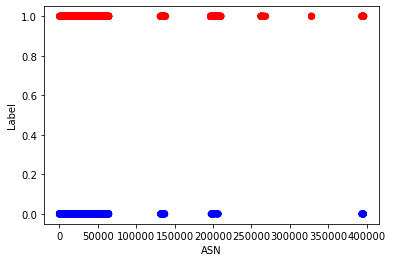

In [28]:
colors = {0: 'blue', 1: 'red'}
plt.scatter(data['asn'], data['label'], c=data['label'].map(colors))
plt.xlabel('ASN')
plt.ylabel('Label')
plt.show()

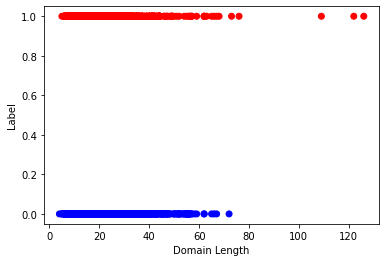

In [29]:
colors = {0: 'blue', 1: 'red'}
plt.scatter(data['domain _length'], data['label'], c=data['label'].map(colors))
plt.xlabel('Domain Length')
plt.ylabel('Label')
plt.show()

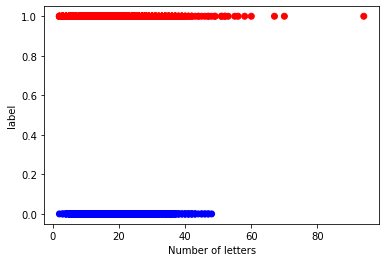

In [30]:
colors = {0: 'blue', 1: 'red'}
plt.scatter(data['n_letters'], data['label'], c=data['label'].map(colors))
plt.xlabel('Number of letters')
plt.ylabel('label')
plt.show()

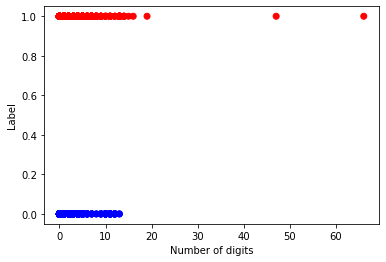

In [31]:
colors = {0: 'blue', 1: 'red'}
plt.scatter(data['n_number'], data['label'], c=data['label'].map(colors))
plt.xlabel('Number of digits')
plt.ylabel('Label')
plt.show()

Outlier Detection and Treatment

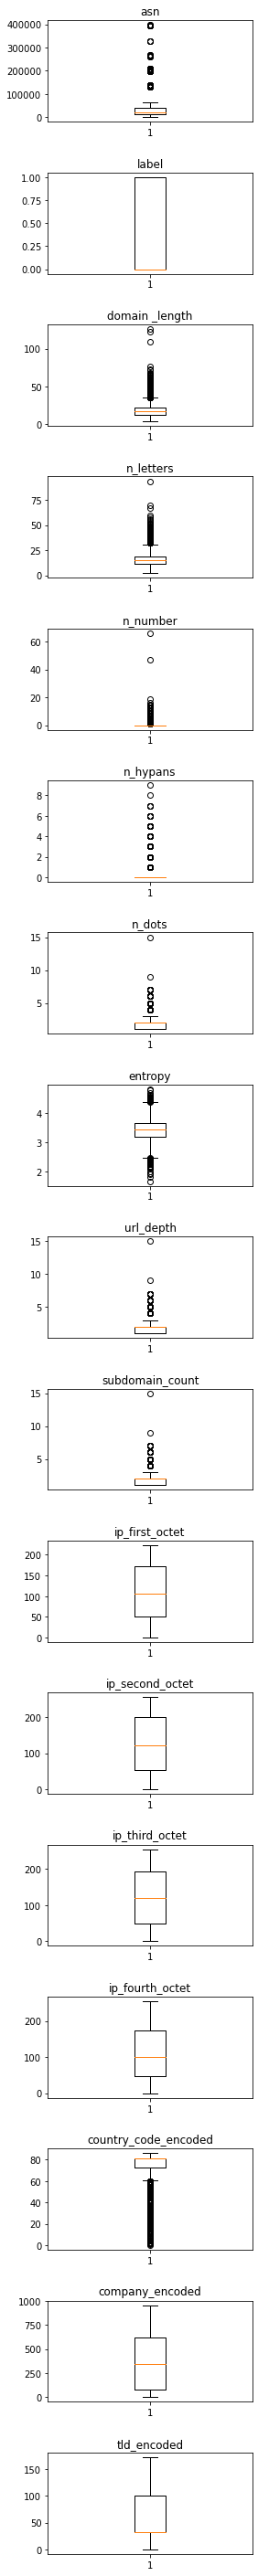

In [32]:
data=data.apply(pd.to_numeric, errors='coerce')
# Createing a figure with subplots for each feature
fig, axs = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(4, 3*len(data.columns)))
# Iterateing over each column in the DataFrame and create a boxplot on its corresponding subplot
for i, col in enumerate(data.columns):
    axs[i].boxplot(data[col])
    axs[i].set_title(col)
# Adjusting the spacing between subplots and display the figure
plt.subplots_adjust(hspace=0.5)
plt.show()

In [33]:
# Defining the lower and upper bounds of the acceptable range for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing all rows that have any value outside of the acceptable range for each feature
data = data[~((data< lower_bound) | (data> upper_bound)).any(axis=1)]


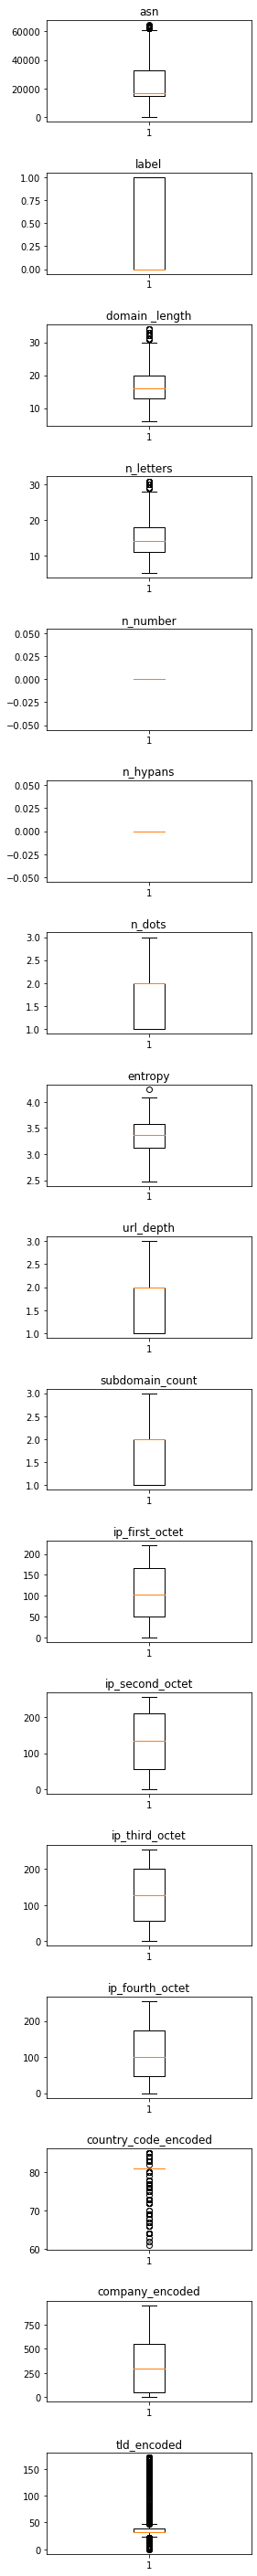

In [34]:
#data=data.apply(pd.to_numeric, errors='coerce')

# Create a figure with subplots for each feature
fig, axs = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(4, 3*len(data.columns)))

# Iterate over each column in the DataFrame and create a boxplot on its corresponding subplot
for i, col in enumerate(data.columns):
    axs[i].boxplot(data[col])
    axs[i].set_title(col)

# Adjust the spacing between subplots and display the figure
plt.subplots_adjust(hspace=0.5)
plt.show()

In [35]:
data.head()

asn  label  domain _length  n_letters  n_number  n_hypans  n_dots  \
0  16509      0              11         10         0         0       1   
1  16509      0              21         18         0         0       3   
3  15169      0              10          9         0         0       1   
4  40027      0              15         13         0         0       2   
6  16509      0              19         17         0         0       2   

    entropy  url_depth  subdomain_count  ip_first_octet  ip_second_octet  \
0  3.459432          1                1              52               49   
1  3.975418          3                3              35              167   
3  2.646439          1                1              74              125   
4  3.373557          2                2              45               57   
6  3.616349          2                2              34              209   

   ip_third_octet  ip_fourth_octet  country_code_encoded  company_encoded  \
0             120                6                    81               30   
1              71              134                    81               30   
3              68              138                    81              341   
4              40                1                    81              552   
6              74               57                    81               30   

   tld_encoded  
0           32  
1           32  
3           32  
4           32  
6           32

In [36]:
data.columns

Index(['asn', 'label', 'domain _length', 'n_letters', 'n_number', 'n_hypans',
       'n_dots', 'entropy', 'url_depth', 'subdomain_count', 'ip_first_octet',
       'ip_second_octet', 'ip_third_octet', 'ip_fourth_octet',
       'country_code_encoded', 'company_encoded', 'tld_encoded'],
      dtype='object')

Histogram

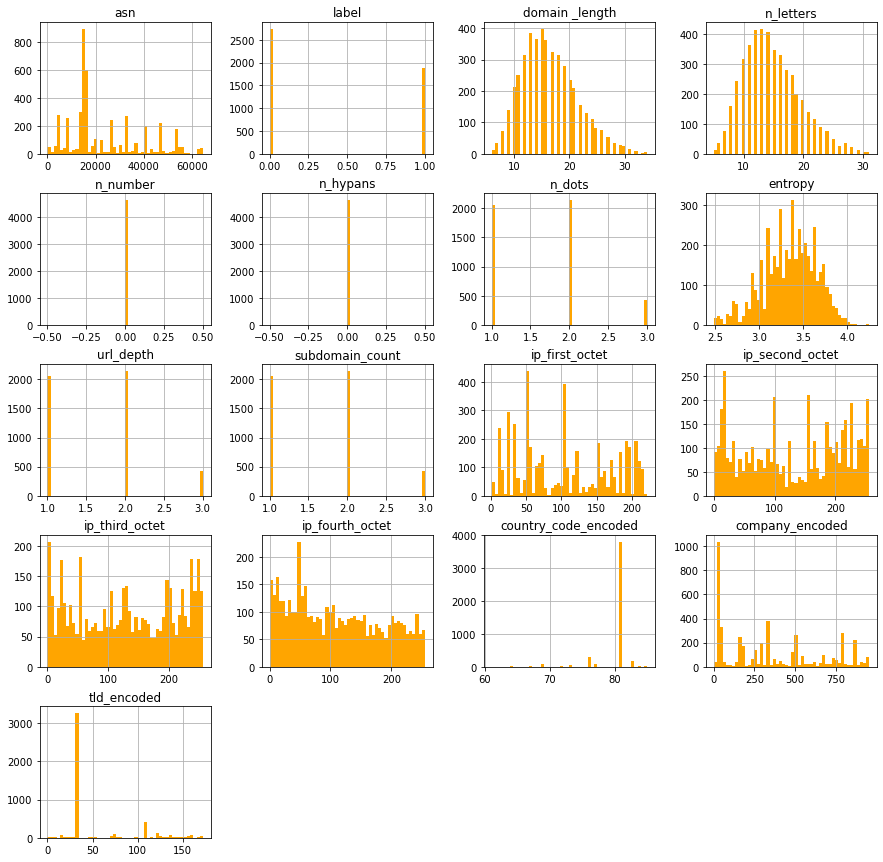

In [37]:
data.hist(bins = 50,figsize = (15,15),color='orange')
plt.show()

In [38]:
data.shape

(4633, 17)

Countplots

<AxesSubplot:xlabel='url_depth', ylabel='count'>

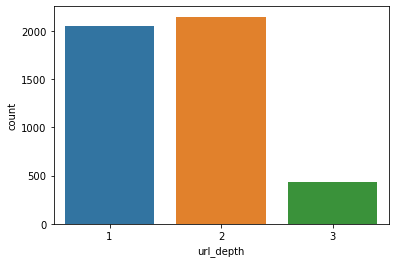

In [39]:
sns.countplot(x='url_depth', data=data)

<AxesSubplot:xlabel='n_letters', ylabel='count'>

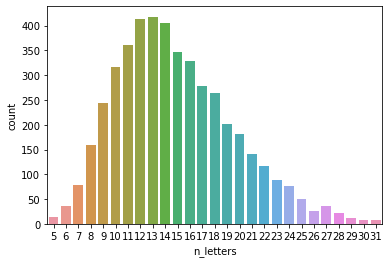

In [40]:
sns.countplot(x='n_letters', data=data)

<AxesSubplot:xlabel='domain _length', ylabel='count'>

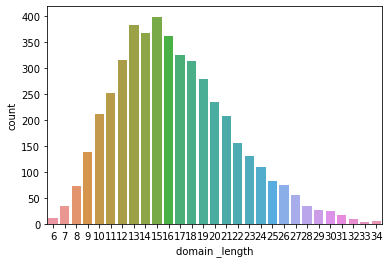

In [41]:
sns.countplot(x='domain _length', data=data)

<AxesSubplot:xlabel='n_number', ylabel='count'>

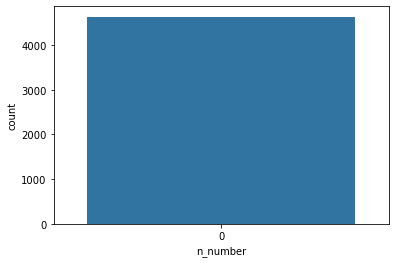

In [42]:
sns.countplot(x='n_number', data=data)

<AxesSubplot:xlabel='n_hypans', ylabel='count'>

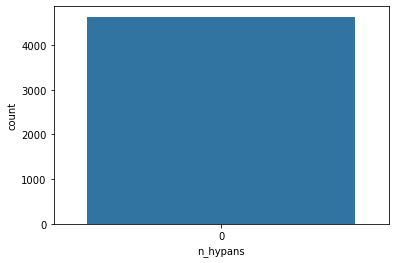

In [43]:
sns.countplot(x='n_hypans', data=data)

<AxesSubplot:xlabel='n_dots', ylabel='count'>

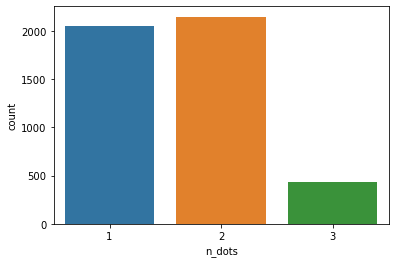

In [44]:
sns.countplot(x='n_dots', data=data)

<AxesSubplot:xlabel='entropy', ylabel='count'>

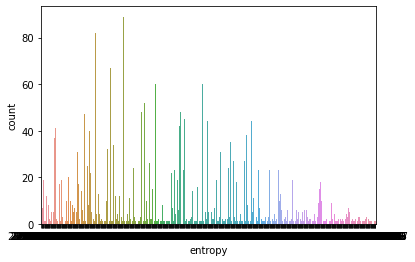

In [45]:
sns.countplot(x='entropy', data=data)

Pairplot

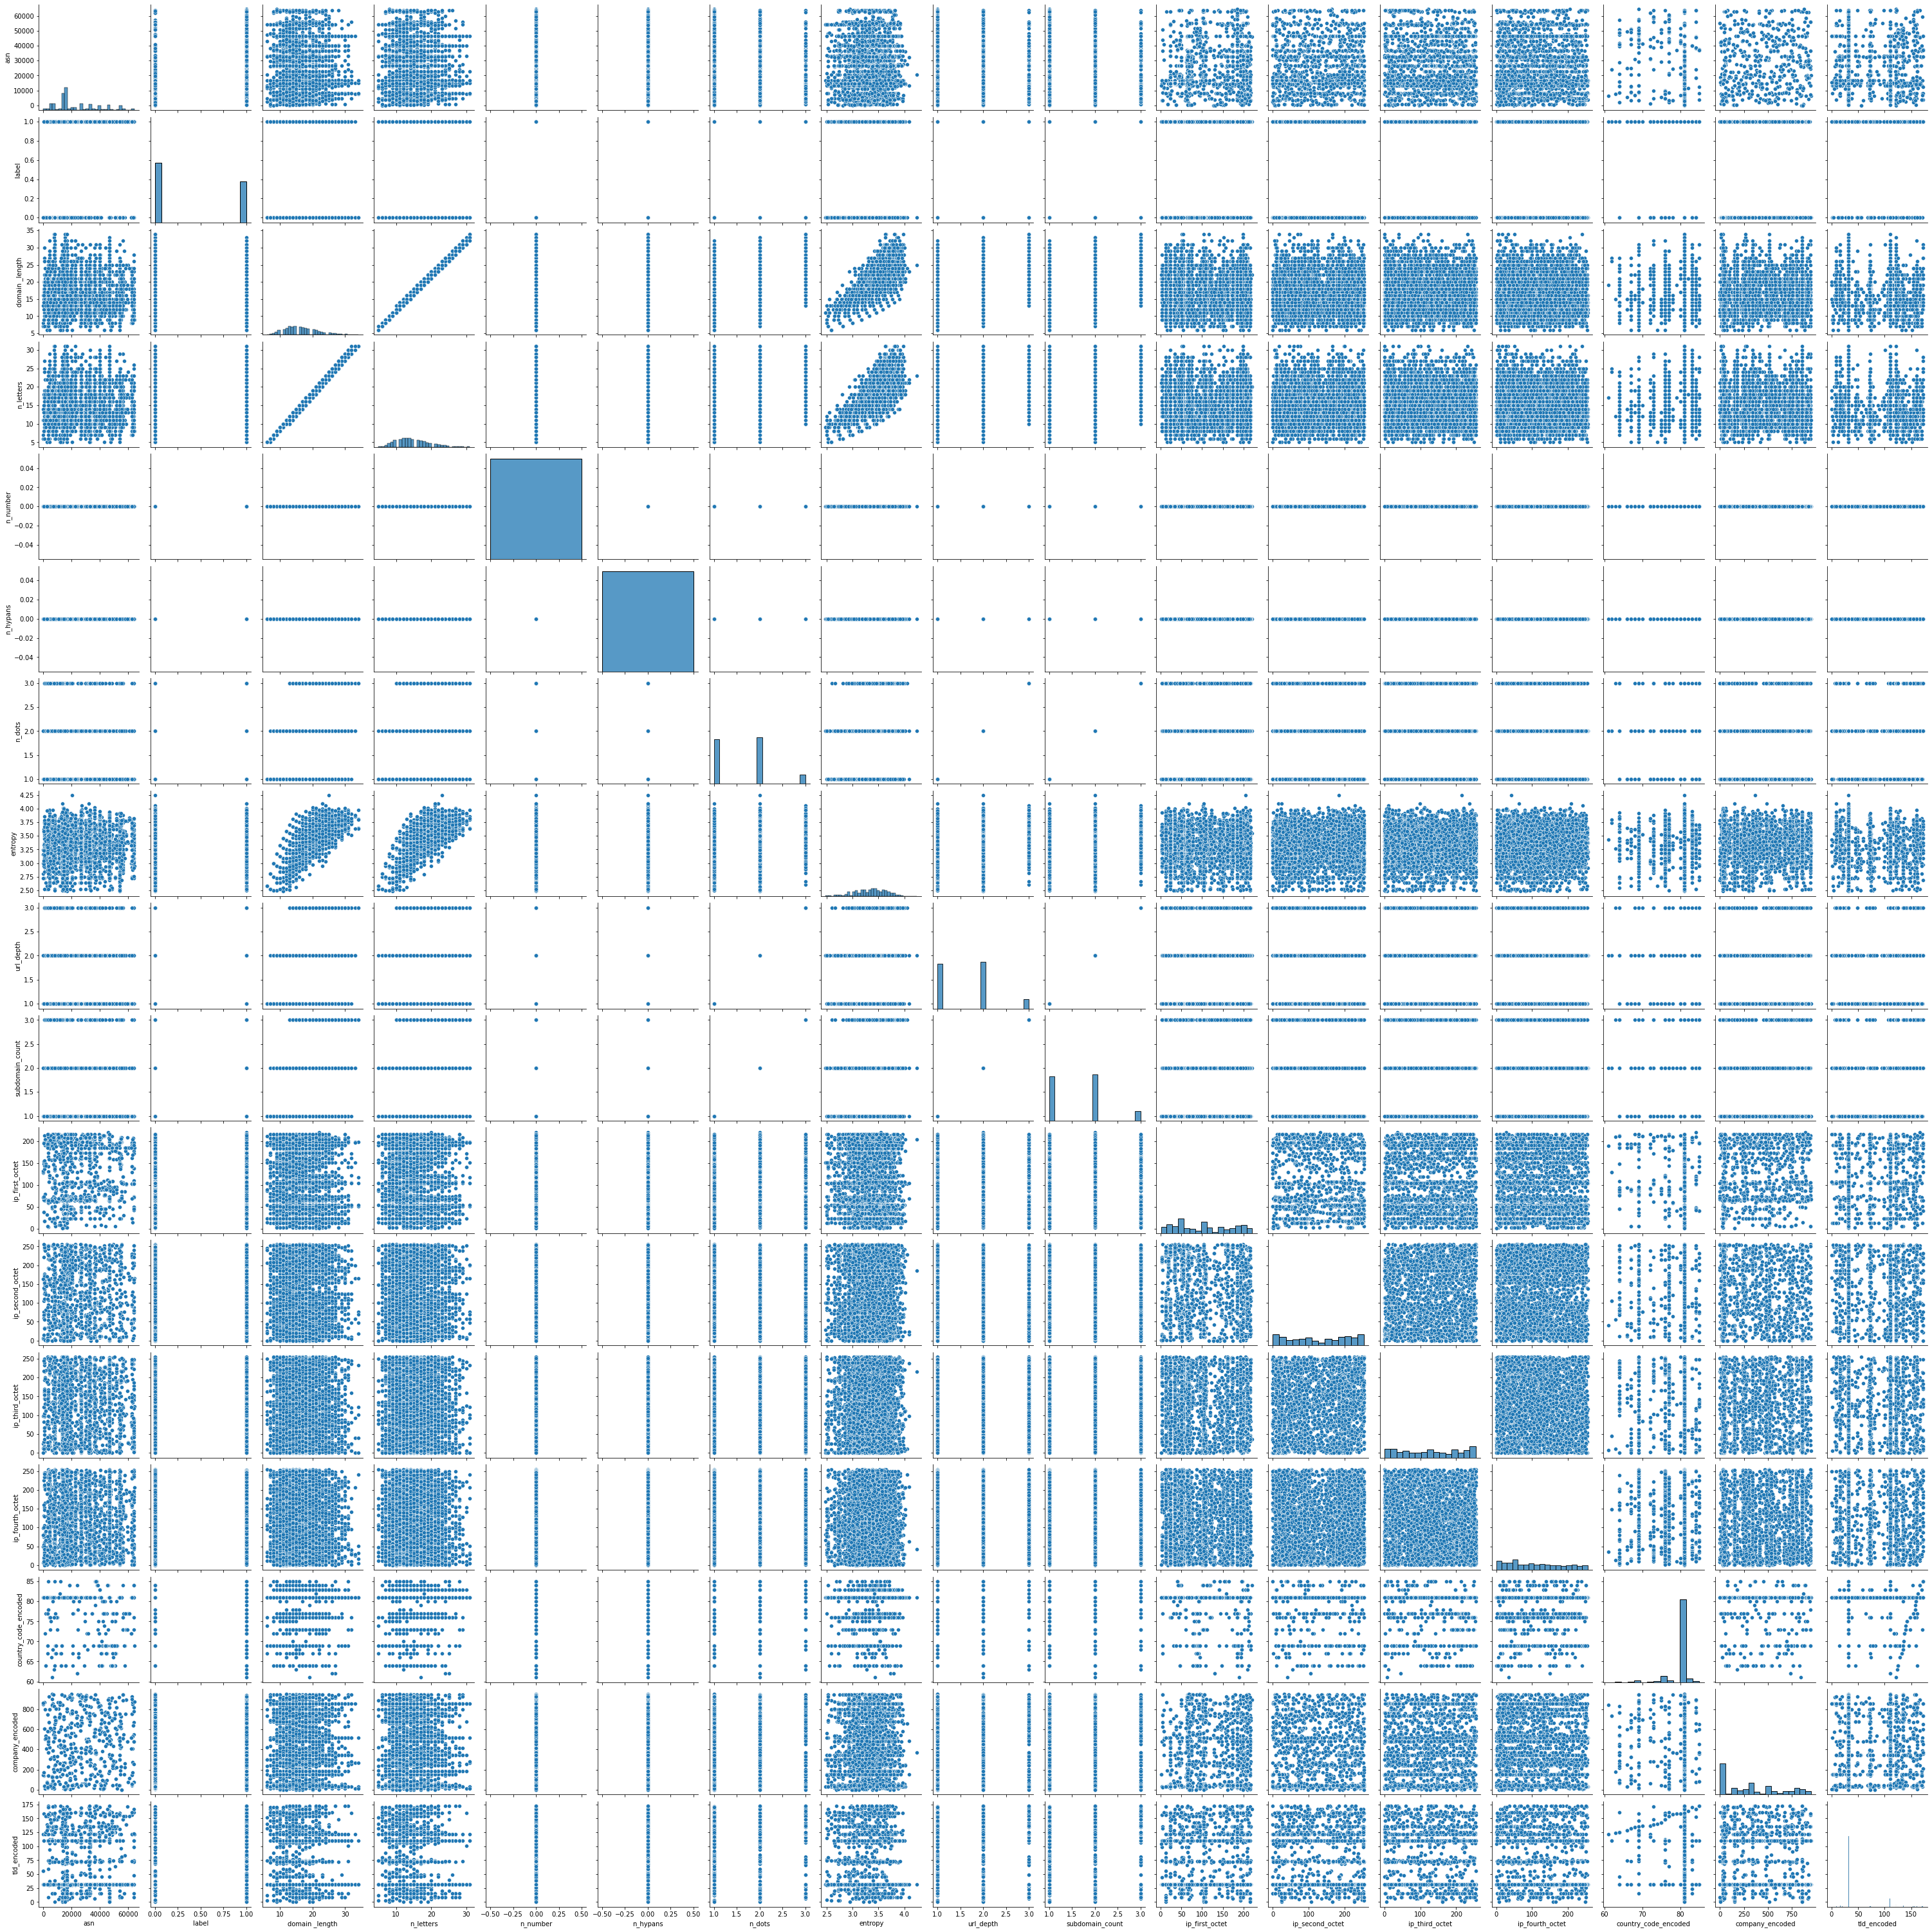

In [46]:
sns.pairplot(data)

In [47]:
data.columns

Index(['asn', 'label', 'domain _length', 'n_letters', 'n_number', 'n_hypans',
       'n_dots', 'entropy', 'url_depth', 'subdomain_count', 'ip_first_octet',
       'ip_second_octet', 'ip_third_octet', 'ip_fourth_octet',
       'country_code_encoded', 'company_encoded', 'tld_encoded'],
      dtype='object')

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4633 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   asn                   4633 non-null   int64  
 1   label                 4633 non-null   int64  
 2   domain _length        4633 non-null   int64  
 3   n_letters             4633 non-null   int64  
 4   n_number              4633 non-null   int64  
 5   n_hypans              4633 non-null   int64  
 6   n_dots                4633 non-null   int64  
 7   entropy               4633 non-null   float64
 8   url_depth             4633 non-null   int64  
 9   subdomain_count       4633 non-null   int64  
 10  ip_first_octet        4633 non-null   int32  
 11  ip_second_octet       4633 non-null   int32  
 12  ip_third_octet        4633 non-null   int32  
 13  ip_fourth_octet       4633 non-null   int32  
 14  country_code_encoded  4633 non-null   int32  
 15  company_encoded      

In [50]:
data.dtypes

asn                       int64
label                     int64
domain _length            int64
n_letters                 int64
n_number                  int64
n_hypans                  int64
n_dots                    int64
entropy                 float64
url_depth                 int64
subdomain_count           int64
ip_first_octet            int32
ip_second_octet           int32
ip_third_octet            int32
ip_fourth_octet           int32
country_code_encoded      int32
company_encoded           int32
tld_encoded               int32
dtype: object

Reset Index

In [51]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

asn  label  domain _length  n_letters  n_number  n_hypans  n_dots  \
0   4651      0              19         17         0         0       2   
1   3598      1              20         19         0         0       1   
2  13335      1              10          9         0         0       1   
3   4651      0              13         11         0         0       2   
4  40034      1              17         16         0         0       1   

    entropy  url_depth  subdomain_count  ip_first_octet  ip_second_octet  \
0  3.576618          2                2             122              155   
1  3.684184          1                1             199                2   
2  3.121928          1                1             104               18   
3  3.026987          2                2             122              155   
4  3.852169          1                1             204               11   

   ip_third_octet  ip_fourth_octet  country_code_encoded  company_encoded  \
0             246              121                    76              799   
1             137              213                    81              514   
2              54              253                    81              155   
3             245               22                    76              799   
4              56               48                    83              182   

   tld_encoded  
0           32  
1          110  
2          110  
3          110  
4           32

# Methodology

In [52]:
y = data['label']
X = data.drop('label',axis=1)

In [53]:
y.sample(6)

2736    0
4065    1
4050    1
3865    1
981     1
993     0
Name: label, dtype: int64

In [54]:
X.sample(6)

asn  domain _length  n_letters  n_number  n_hypans  n_dots   entropy  \
1341  16509              13         11         0         0       2  3.238901   
210   29873              16         15         0         0       1  3.375000   
2318  16509              10          9         0         0       1  2.646439   
1034  36874              19         17         0         0       2  3.471354   
2967  26496              12         10         0         0       2  3.022055   
4342  15169              16         14         0         0       2  3.500000   

      url_depth  subdomain_count  ip_first_octet  ip_second_octet  \
1341          2                2              18              195   
210           1                1             207              148   
2318          1                1              99               79   
1034          2                2             196               41   
2967          2                2              50               63   
4342          2                2             107              178   

      ip_third_octet  ip_fourth_octet  country_code_encoded  company_encoded  \
1341             155              181                    81               30   
210              248              143                    81              102   
2318             101              100                    81               30   
1034             122               37                    85              213   
2967             202               40                    81               47   
4342             247               57                    81              341   

      tld_encoded  
1341           32  
210            32  
2318           20  
1034          172  
2967          161  
4342           32

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [56]:
print('Shape of X_train is',X_train.shape)
print('Shape of X_test is',X_test.shape)
print('Shape of y_train is',y_train.shape)
print('Shape of y_test is',y_test.shape)

Shape of X_train is (3243, 16)
Shape of X_test is (1390, 16)
Shape of y_train is (3243,)
Shape of y_test is (1390,)


In [57]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

In [58]:
#function to call for storing the results
def storeResults(model, a,b):
 ML_Model.append(model)
 acc_train.append(round(a, 3))
 acc_test.append(round(b, 3))

In [59]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

In [60]:
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree*100))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree*100))

Decision Tree: Accuracy on training Data: 85.600
Decision Tree: Accuracy on test Data: 84.101


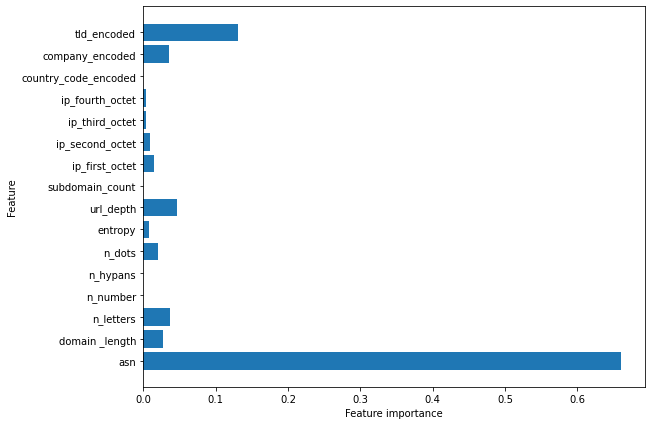

In [61]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [62]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

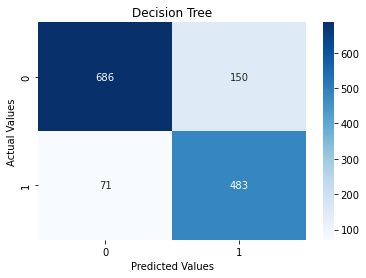

In [63]:
cm=confusion_matrix(y_test,y_test_tree)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Decision Tree')
plt.show()

In [64]:
# instantiate the model
forest = RandomForestClassifier(max_depth=5)
# fit the model 
forest.fit(X_train, y_train)
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

In [65]:
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest*100))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest*100))

Random forest: Accuracy on training Data: 88.036
Random forest: Accuracy on test Data: 87.986


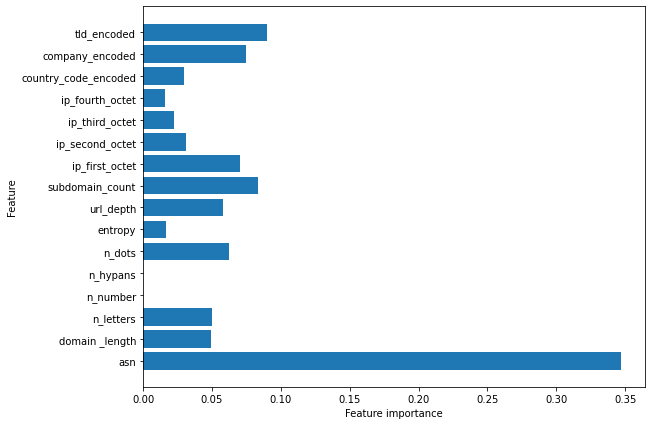

In [66]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [67]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

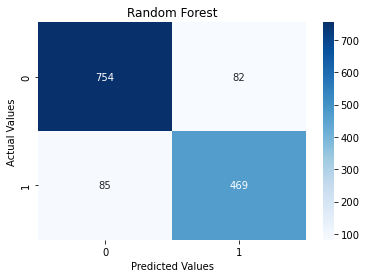

In [68]:
cm=confusion_matrix(y_test,y_test_forest)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest')
plt.show()

In [69]:
# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))
# fit the model 
mlp.fit(X_train, y_train)
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

In [70]:
print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp*100))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp*100))

Multilayer Perceptrons: Accuracy on training Data: 59.019
Multilayer Perceptrons: Accuracy on test Data: 60.000


In [71]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

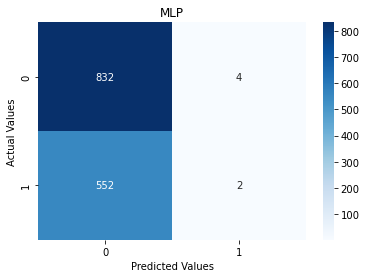

In [72]:
cm=confusion_matrix(y_test,y_test_mlp)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP')
plt.show()

In [73]:
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

In [74]:
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb*100))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb*100))

XGBoost: Accuracy on training Data: 100.000
XGBoost : Accuracy on test Data: 91.007


In [75]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

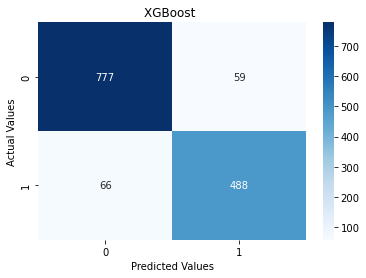

In [76]:
cm=confusion_matrix(y_test,y_test_xgb)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('XGBoost ')
plt.show()

In [77]:
# instantiate the model
logreg = LogisticRegression(random_state=12)
# fit the model
logreg.fit(X_train, y_train)
# predict on the test and train sets
y_test_logreg = logreg.predict(X_test)
y_train_logreg = logreg.predict(X_train)
# calculate the accuracy scores
acc_train_logreg = accuracy_score(y_train, y_train_logreg)
acc_test_logreg = accuracy_score(y_test, y_test_logreg)

In [78]:
print("LogisticRegression: Accuracy on training Data: {:.3f}".format(acc_train_logreg*100))
print("LogisticRegression: Accuracy on test Data: {:.3f}".format(acc_test_logreg*100))

LogisticRegression: Accuracy on training Data: 69.781
LogisticRegression: Accuracy on test Data: 71.871


In [79]:
storeResults('Logistic Regression',acc_train_logreg,acc_test_logreg)

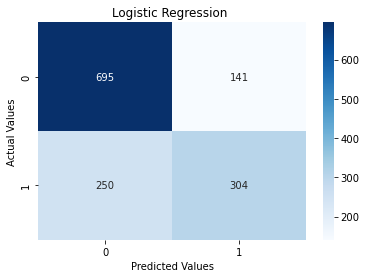

In [80]:
cm=confusion_matrix(y_test,y_test_logreg)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression ')
plt.show()

In [81]:
results = pd.DataFrame({ 'ML Model': ML_Model, 
 'Train Accuracy': acc_train,
 'Test Accuracy': acc_test})

In [82]:
print(results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False))

                 ML Model  Train Accuracy  Test Accuracy
3                 XGBoost           1.000          0.910
1           Random Forest           0.880          0.880
0           Decision Tree           0.856          0.841
4     Logistic Regression           0.698          0.719
2  Multilayer Perceptrons           0.590          0.600
